In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm

### Loading data

In [16]:
X = np.load('./data/X.npy')
X_polynomial = np.load('./data/X_polynomial.npy')
y = np.load('./data/y.npy')

### Pipelines

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import PassiveAggressiveRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

In [18]:
huber_reg = HuberRegressor(epsilon= 5.09, alpha= 0.0004)
ridge_reg = linear_model.Ridge(solver='saga', max_iter=4000, alpha= 0.582)
lasso_reg = linear_model.Lasso(max_iter=4000, alpha=0.0038, normalize=False)
dt_reg = tree.DecisionTreeRegressor(min_samples_split=7, min_samples_leaf=7, min_weight_fraction_leaf=0.000516, 
                                                                                             max_features='auto')
    
pa_reg = PassiveAggressiveRegressor(max_iter=3600, tol=1e-3)
xgb_reg = xgb.XGBRegressor(objective="reg:linear", alpha= 0.00244, booster='dart', eta= 0.017326, gamma=0.19504, 
                           reg_lambda=0.22451, max_depth=8)

In [19]:
models = [huber_reg, ridge_reg, lasso_reg, dt_reg, pa_reg]

### Let's find the best ensemble

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from mlxtend.regressor import StackingRegressor
import warnings
warnings.filterwarnings('ignore')

In [21]:
huber_reg = HuberRegressor(epsilon= 5.09, alpha= 0.0004)
ridge_reg = linear_model.Ridge(solver='saga', max_iter=4000, alpha= 0.582)
lasso_reg = linear_model.Lasso(max_iter=4000, alpha=0.0038, normalize=False)
dt_reg = tree.DecisionTreeRegressor(min_samples_split=7, min_samples_leaf=7, min_weight_fraction_leaf=0.000516, 
                                                                                             max_features='auto')
    
pa_reg = PassiveAggressiveRegressor(max_iter=3600, tol=1e-3)
xgb_reg = xgb.XGBRegressor(objective="reg:linear", alpha= 0.00244, booster='dart', eta= 0.017326, gamma=0.19504, 
                           reg_lambda=0.22451, max_depth=8, verbosity=0)

models = [huber_reg, ridge_reg, lasso_reg, dt_reg, xgb_reg, pa_reg]

<BarContainer object of 3 artists>

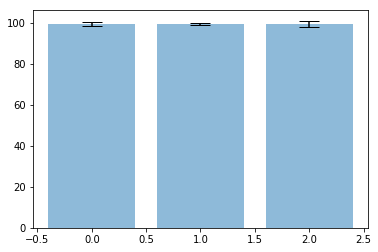

In [32]:
# labels = ['Aluminum', 'Copper', 'Steel']
# x_pos = np.arange(len(labels))
# CTEs = [0.00.5, 99.51, 99.501]
# error = [1, 0.5, 1.5]
# fig, ax = plt.subplots()
# ax.bar(x_pos, CTEs,
#        yerr=error,
#        align='center',
#        alpha=0.5,
#        ecolor='black',
#        capsize=10)

In [35]:
model_names = [type(model).__name__ for model in models]
r2_scores_mean = []
mse_scores_mean = []
mae_scores_mean = []
r2_scores_std = []
mse_scores_std = []
mae_scores_std = []


for model in models:    
    print("Metaregressor:", type(model).__name__)
    stregr = StackingRegressor(regressors=models, meta_regressor=model)
    scoring = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
    scores = cross_validate(stregr, X, y, scoring=scoring, cv=5)
    
    r2_scores_mean.append(scores['test_r2'].mean())
    mse_scores_mean.append(-scores['test_neg_mean_squared_error'].mean())
    mae_scores_mean.append(-scores['test_neg_mean_absolute_error'].mean())
    r2_scores_std.append(scores['test_r2'].std() * 2)
    mse_scores_std.append(scores['test_neg_mean_squared_error'].std() * 2)
    mae_scores_std.append(scores['test_neg_mean_absolute_error'].std() * 2)
    
    print("95% confindence interval:")
    print("r2_score: %0.5f (+/- %0.5f)" % (scores['test_r2'].mean(), scores['test_r2'].std() * 2))
    print("MSE: %0.5f (+/- %0.5f)" % (-scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std() * 2))
    print("MAE: %0.5f (+/- %0.5f)" % (-scores['test_neg_mean_absolute_error'].mean(), scores['test_neg_mean_absolute_error'].std() * 2))
    print()
    print("----------------------------")

Metaregressor: HuberRegressor
95% confindence interval:
r2_score: 0.99952 (+/- 0.00003)
MSE: 0.07790 (+/- 0.00563)
MAE: 0.21598 (+/- 0.00477)

----------------------------
Metaregressor: Ridge
95% confindence interval:
r2_score: 0.99951 (+/- 0.00003)
MSE: 0.07886 (+/- 0.00540)
MAE: 0.21716 (+/- 0.00445)

----------------------------
Metaregressor: Lasso
95% confindence interval:
r2_score: 0.99931 (+/- 0.00009)
MSE: 0.11194 (+/- 0.01140)
MAE: 0.25725 (+/- 0.00805)

----------------------------
Metaregressor: DecisionTreeRegressor
95% confindence interval:
r2_score: 0.99949 (+/- 0.00003)
MSE: 0.08358 (+/- 0.00599)
MAE: 0.22507 (+/- 0.00606)

----------------------------
Metaregressor: XGBRegressor
95% confindence interval:
r2_score: 0.99952 (+/- 0.00002)
MSE: 0.07739 (+/- 0.00441)
MAE: 0.21611 (+/- 0.00500)

----------------------------
Metaregressor: PassiveAggressiveRegressor
95% confindence interval:
r2_score: 0.98913 (+/- 0.03609)
MSE: 1.75440 (+/- 5.79258)
MAE: 0.79214 (+/- 1.59487)

### Scores for different models visualisation

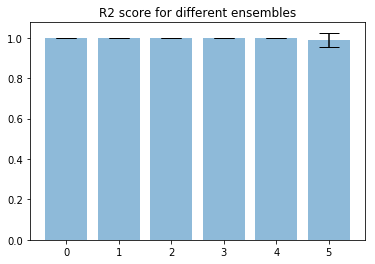

In [46]:
labels = model_names
x_pos = np.arange(len(labels))
CTEs = r2_scores_mean
error = r2_scores_std
fig, ax = plt.subplots()
ax.set_title("R2 score for different ensembles")
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.show()

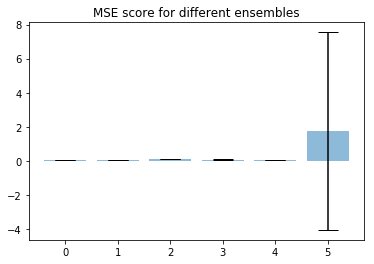

In [47]:
labels = model_names
x_pos = np.arange(len(labels))
CTEs = mse_scores_mean
error = mse_scores_std
fig, ax = plt.subplots()
ax.set_title("MSE score for different ensembles")
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.show()

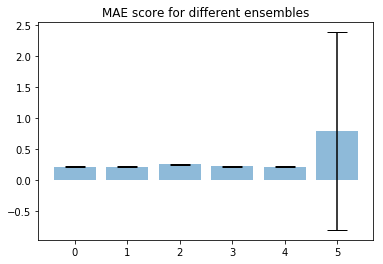

In [48]:
labels = model_names
x_pos = np.arange(len(labels))
CTEs = mae_scores_mean
error = mae_scores_std
fig, ax = plt.subplots()
ax.set_title("MAE score for different ensembles")
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10) 
plt.show()

#### As we can see the best r2_score 0.99952 achieves if using huber regressor as metamodel